In [59]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [60]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.4.0


In [61]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

In [62]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices(series) #need to slice first
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)    #create 980 dataset, each has 21 dataset
  #  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))   # flatten out into 980 dataset, each is an array of 21 element
 # dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
 # dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [67]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
#print(dataset.__len__)
for window in dataset:
    for element in window:
        print(element.numpy(),end=" ")
    print()


52.48357 49.35275 53.314735 57.711823 48.934444 48.931244 57.982895 53.897125 47.67393 52.68371 47.591717 47.506374 50.959415 40.086178 40.919415 46.612473 44.228207 50.720642 44.454983 41.76799 55.980938 
49.35275 53.314735 57.711823 48.934444 48.931244 57.982895 53.897125 47.67393 52.68371 47.591717 47.506374 50.959415 40.086178 40.919415 46.612473 44.228207 50.720642 44.454983 41.76799 55.980938 47.335835 
53.314735 57.711823 48.934444 48.931244 57.982895 53.897125 47.67393 52.68371 47.591717 47.506374 50.959415 40.086178 40.919415 46.612473 44.228207 50.720642 44.454983 41.76799 55.980938 47.335835 48.6033 
57.711823 48.934444 48.931244 57.982895 53.897125 47.67393 52.68371 47.591717 47.506374 50.959415 40.086178 40.919415 46.612473 44.228207 50.720642 44.454983 41.76799 55.980938 47.335835 48.6033 40.93184 
48.934444 48.931244 57.982895 53.897125 47.67393 52.68371 47.591717 47.506374 50.959415 40.086178 40.919415 46.612473 44.228207 50.720642 44.454983 41.76799 55.980938 47.335835

41.514812 40.177532 33.871693 37.237713 38.097908 45.242546 41.222683 30.229015 40.196377 36.174564 34.231815 40.183838 41.78223 40.778324 31.413609 33.544636 36.22143 38.910835 31.098982 32.022236 26.868631 
40.177532 33.871693 37.237713 38.097908 45.242546 41.222683 30.229015 40.196377 36.174564 34.231815 40.183838 41.78223 40.778324 31.413609 33.544636 36.22143 38.910835 31.098982 32.022236 26.868631 25.863333 
33.871693 37.237713 38.097908 45.242546 41.222683 30.229015 40.196377 36.174564 34.231815 40.183838 41.78223 40.778324 31.413609 33.544636 36.22143 38.910835 31.098982 32.022236 26.868631 25.863333 35.345516 
37.237713 38.097908 45.242546 41.222683 30.229015 40.196377 36.174564 34.231815 40.183838 41.78223 40.778324 31.413609 33.544636 36.22143 38.910835 31.098982 32.022236 26.868631 25.863333 35.345516 37.49725 
38.097908 45.242546 41.222683 30.229015 40.196377 36.174564 34.231815 40.183838 41.78223 40.778324 31.413609 33.544636 36.22143 38.910835 31.098982 32.022236 26.8686

17.22026 15.136701 16.036467 22.487074 18.91756 13.98788 18.565226 15.846029 19.565367 10.573323 11.806878 10.846607 4.8520856 13.013545 12.202472 10.28818 8.456475 1.9209299 6.2647085 6.02649 3.1029897 
15.136701 16.036467 22.487074 18.91756 13.98788 18.565226 15.846029 19.565367 10.573323 11.806878 10.846607 4.8520856 13.013545 12.202472 10.28818 8.456475 1.9209299 6.2647085 6.02649 3.1029897 5.6846423 
16.036467 22.487074 18.91756 13.98788 18.565226 15.846029 19.565367 10.573323 11.806878 10.846607 4.8520856 13.013545 12.202472 10.28818 8.456475 1.9209299 6.2647085 6.02649 3.1029897 5.6846423 7.8905945 
22.487074 18.91756 13.98788 18.565226 15.846029 19.565367 10.573323 11.806878 10.846607 4.8520856 13.013545 12.202472 10.28818 8.456475 1.9209299 6.2647085 6.02649 3.1029897 5.6846423 7.8905945 14.683323 
18.91756 13.98788 18.565226 15.846029 19.565367 10.573323 11.806878 10.846607 4.8520856 13.013545 12.202472 10.28818 8.456475 1.9209299 6.2647085 6.02649 3.1029897 5.6846423 7.89059

-2.2406242 5.248558 -11.178716 -9.573152 -6.752203 -10.269627 -16.000174 -8.391326 -14.525441 -7.3181014 -14.747516 -2.8571053 -14.97132 -13.105373 -7.8591013 -18.504087 -11.626857 -6.6340213 -21.603775 -13.030719 -13.032789 
5.248558 -11.178716 -9.573152 -6.752203 -10.269627 -16.000174 -8.391326 -14.525441 -7.3181014 -14.747516 -2.8571053 -14.97132 -13.105373 -7.8591013 -18.504087 -11.626857 -6.6340213 -21.603775 -13.030719 -13.032789 -10.792066 
-11.178716 -9.573152 -6.752203 -10.269627 -16.000174 -8.391326 -14.525441 -7.3181014 -14.747516 -2.8571053 -14.97132 -13.105373 -7.8591013 -18.504087 -11.626857 -6.6340213 -21.603775 -13.030719 -13.032789 -10.792066 23.163013 
-9.573152 -6.752203 -10.269627 -16.000174 -8.391326 -14.525441 -7.3181014 -14.747516 -2.8571053 -14.97132 -13.105373 -7.8591013 -18.504087 -11.626857 -6.6340213 -21.603775 -13.030719 -13.032789 -10.792066 23.163013 22.696869 
-6.752203 -10.269627 -16.000174 -8.391326 -14.525441 -7.3181014 -14.747516 -2.8571053 -14.97132

30.619787 32.631824 37.97182 27.227936 24.653889 23.943367 24.280926 27.944168 30.005796 29.654501 32.37862 28.28001 35.455605 26.838215 41.736534 31.238834 23.800137 22.7075 30.450966 26.898535 31.563684 
32.631824 37.97182 27.227936 24.653889 23.943367 24.280926 27.944168 30.005796 29.654501 32.37862 28.28001 35.455605 26.838215 41.736534 31.238834 23.800137 22.7075 30.450966 26.898535 31.563684 30.338299 
37.97182 27.227936 24.653889 23.943367 24.280926 27.944168 30.005796 29.654501 32.37862 28.28001 35.455605 26.838215 41.736534 31.238834 23.800137 22.7075 30.450966 26.898535 31.563684 30.338299 27.586983 
27.227936 24.653889 23.943367 24.280926 27.944168 30.005796 29.654501 32.37862 28.28001 35.455605 26.838215 41.736534 31.238834 23.800137 22.7075 30.450966 26.898535 31.563684 30.338299 27.586983 23.696756 
24.653889 23.943367 24.280926 27.944168 30.005796 29.654501 32.37862 28.28001 35.455605 26.838215 41.736534 31.238834 23.800137 22.7075 30.450966 26.898535 31.563684 30.338299

30.216269 30.212847 46.89202 30.474054 33.289154 32.373535 30.853155 26.012995 31.377792 23.712889 26.387451 25.139708 27.971327 39.131126 18.217827 30.982216 19.484531 25.18608 32.98855 27.863678 22.15246 
30.212847 46.89202 30.474054 33.289154 32.373535 30.853155 26.012995 31.377792 23.712889 26.387451 25.139708 27.971327 39.131126 18.217827 30.982216 19.484531 25.18608 32.98855 27.863678 22.15246 23.963987 
46.89202 30.474054 33.289154 32.373535 30.853155 26.012995 31.377792 23.712889 26.387451 25.139708 27.971327 39.131126 18.217827 30.982216 19.484531 25.18608 32.98855 27.863678 22.15246 23.963987 30.938232 
30.474054 33.289154 32.373535 30.853155 26.012995 31.377792 23.712889 26.387451 25.139708 27.971327 39.131126 18.217827 30.982216 19.484531 25.18608 32.98855 27.863678 22.15246 23.963987 30.938232 23.888557 
33.289154 32.373535 30.853155 26.012995 31.377792 23.712889 26.387451 25.139708 27.971327 39.131126 18.217827 30.982216 19.484531 25.18608 32.98855 27.863678 22.15246 23.9

21.320347 32.222126 38.251995 32.812275 20.062172 25.247257 34.012722 24.14989 29.917734 31.582527 23.085745 27.434132 11.5371 22.63349 26.50489 21.541426 35.955315 20.655773 25.61978 28.487524 35.054302 
32.222126 38.251995 32.812275 20.062172 25.247257 34.012722 24.14989 29.917734 31.582527 23.085745 27.434132 11.5371 22.63349 26.50489 21.541426 35.955315 20.655773 25.61978 28.487524 35.054302 20.683037 
38.251995 32.812275 20.062172 25.247257 34.012722 24.14989 29.917734 31.582527 23.085745 27.434132 11.5371 22.63349 26.50489 21.541426 35.955315 20.655773 25.61978 28.487524 35.054302 20.683037 33.692867 
32.812275 20.062172 25.247257 34.012722 24.14989 29.917734 31.582527 23.085745 27.434132 11.5371 22.63349 26.50489 21.541426 35.955315 20.655773 25.61978 28.487524 35.054302 20.683037 33.692867 27.943205 
20.062172 25.247257 34.012722 24.14989 29.917734 31.582527 23.085745 27.434132 11.5371 22.63349 26.50489 21.541426 35.955315 20.655773 25.61978 28.487524 35.054302 20.683037 33.692

25.743662 25.281895 32.497025 30.054634 24.825788 32.809357 29.869114 32.418423 31.52398 24.252817 25.619074 32.178864 31.51689 28.383394 29.097626 34.92262 25.599964 31.317053 27.594559 27.541286 34.147957 
25.281895 32.497025 30.054634 24.825788 32.809357 29.869114 32.418423 31.52398 24.252817 25.619074 32.178864 31.51689 28.383394 29.097626 34.92262 25.599964 31.317053 27.594559 27.541286 34.147957 32.805748 
32.497025 30.054634 24.825788 32.809357 29.869114 32.418423 31.52398 24.252817 25.619074 32.178864 31.51689 28.383394 29.097626 34.92262 25.599964 31.317053 27.594559 27.541286 34.147957 32.805748 32.771015 
30.054634 24.825788 32.809357 29.869114 32.418423 31.52398 24.252817 25.619074 32.178864 31.51689 28.383394 29.097626 34.92262 25.599964 31.317053 27.594559 27.541286 34.147957 32.805748 32.771015 35.255863 
24.825788 32.809357 29.869114 32.418423 31.52398 24.252817 25.619074 32.178864 31.51689 28.383394 29.097626 34.92262 25.599964 31.317053 27.594559 27.541286 34.147957 3

24.697277 29.591013 25.8548 34.145004 28.563086 25.200027 27.749893 31.45096 26.59733 25.334665 30.694183 30.730724 27.001482 27.211473 30.757544 22.38766 22.621704 26.097902 28.654142 31.307323 37.161125 
29.591013 25.8548 34.145004 28.563086 25.200027 27.749893 31.45096 26.59733 25.334665 30.694183 30.730724 27.001482 27.211473 30.757544 22.38766 22.621704 26.097902 28.654142 31.307323 37.161125 34.104355 
25.8548 34.145004 28.563086 25.200027 27.749893 31.45096 26.59733 25.334665 30.694183 30.730724 27.001482 27.211473 30.757544 22.38766 22.621704 26.097902 28.654142 31.307323 37.161125 34.104355 29.048223 
34.145004 28.563086 25.200027 27.749893 31.45096 26.59733 25.334665 30.694183 30.730724 27.001482 27.211473 30.757544 22.38766 22.621704 26.097902 28.654142 31.307323 37.161125 34.104355 29.048223 29.784843 
28.563086 25.200027 27.749893 31.45096 26.59733 25.334665 30.694183 30.730724 27.001482 27.211473 30.757544 22.38766 22.621704 26.097902 28.654142 31.307323 37.161125 34.1043

64.32207 72.446625 68.91631 78.85159 63.752514 63.475304 64.5454 56.779926 64.616325 63.28385 67.65466 68.4235 75.89651 71.0577 63.200054 61.360634 68.069664 58.755577 74.25012 70.71561 62.1877 
72.446625 68.91631 78.85159 63.752514 63.475304 64.5454 56.779926 64.616325 63.28385 67.65466 68.4235 75.89651 71.0577 63.200054 61.360634 68.069664 58.755577 74.25012 70.71561 62.1877 55.672768 
68.91631 78.85159 63.752514 63.475304 64.5454 56.779926 64.616325 63.28385 67.65466 68.4235 75.89651 71.0577 63.200054 61.360634 68.069664 58.755577 74.25012 70.71561 62.1877 55.672768 70.70246 
78.85159 63.752514 63.475304 64.5454 56.779926 64.616325 63.28385 67.65466 68.4235 75.89651 71.0577 63.200054 61.360634 68.069664 58.755577 74.25012 70.71561 62.1877 55.672768 70.70246 63.04496 
63.752514 63.475304 64.5454 56.779926 64.616325 63.28385 67.65466 68.4235 75.89651 71.0577 63.200054 61.360634 68.069664 58.755577 74.25012 70.71561 62.1877 55.672768 70.70246 63.04496 69.481316 
63.475304 64.5454 56.77

52.09588 57.672966 55.509987 58.588013 46.375916 54.080563 55.38649 40.739193 43.049755 38.197876 46.469997 50.822926 54.160572 46.428406 53.605907 37.963173 35.743767 43.376278 44.964203 42.267 31.476778 
57.672966 55.509987 58.588013 46.375916 54.080563 55.38649 40.739193 43.049755 38.197876 46.469997 50.822926 54.160572 46.428406 53.605907 37.963173 35.743767 43.376278 44.964203 42.267 31.476778 40.74903 
55.509987 58.588013 46.375916 54.080563 55.38649 40.739193 43.049755 38.197876 46.469997 50.822926 54.160572 46.428406 53.605907 37.963173 35.743767 43.376278 44.964203 42.267 31.476778 40.74903 34.05024 
58.588013 46.375916 54.080563 55.38649 40.739193 43.049755 38.197876 46.469997 50.822926 54.160572 46.428406 53.605907 37.963173 35.743767 43.376278 44.964203 42.267 31.476778 40.74903 34.05024 43.29642 
46.375916 54.080563 55.38649 40.739193 43.049755 38.197876 46.469997 50.822926 54.160572 46.428406 53.605907 37.963173 35.743767 43.376278 44.964203 42.267 31.476778 40.74903 34.0

29.688772 29.7776 22.711872 21.861979 22.74508 11.99279 15.311469 29.109999 29.892042 19.817163 23.34403 21.420355 34.665504 24.280306 17.458702 12.741154 8.912089 17.392189 12.028938 8.140686 11.465986 
29.7776 22.711872 21.861979 22.74508 11.99279 15.311469 29.109999 29.892042 19.817163 23.34403 21.420355 34.665504 24.280306 17.458702 12.741154 8.912089 17.392189 12.028938 8.140686 11.465986 8.743816 
22.711872 21.861979 22.74508 11.99279 15.311469 29.109999 29.892042 19.817163 23.34403 21.420355 34.665504 24.280306 17.458702 12.741154 8.912089 17.392189 12.028938 8.140686 11.465986 8.743816 22.045954 
21.861979 22.74508 11.99279 15.311469 29.109999 29.892042 19.817163 23.34403 21.420355 34.665504 24.280306 17.458702 12.741154 8.912089 17.392189 12.028938 8.140686 11.465986 8.743816 22.045954 17.48329 
22.74508 11.99279 15.311469 29.109999 29.892042 19.817163 23.34403 21.420355 34.665504 24.280306 17.458702 12.741154 8.912089 17.392189 12.028938 8.140686 11.465986 8.743816 22.045954 

2.1182992 0.36368567 4.538722 -0.2369535 4.9011045 47.34658 46.35441 42.963524 44.570477 51.18507 49.86728 42.430267 47.770836 50.988007 38.8417 49.86395 43.793186 49.91921 43.210567 37.963825 38.81263 
0.36368567 4.538722 -0.2369535 4.9011045 47.34658 46.35441 42.963524 44.570477 51.18507 49.86728 42.430267 47.770836 50.988007 38.8417 49.86395 43.793186 49.91921 43.210567 37.963825 38.81263 47.153587 
4.538722 -0.2369535 4.9011045 47.34658 46.35441 42.963524 44.570477 51.18507 49.86728 42.430267 47.770836 50.988007 38.8417 49.86395 43.793186 49.91921 43.210567 37.963825 38.81263 47.153587 48.17531 
-0.2369535 4.9011045 47.34658 46.35441 42.963524 44.570477 51.18507 49.86728 42.430267 47.770836 50.988007 38.8417 49.86395 43.793186 49.91921 43.210567 37.963825 38.81263 47.153587 48.17531 42.31936 
4.9011045 47.34658 46.35441 42.963524 44.570477 51.18507 49.86728 42.430267 47.770836 50.988007 38.8417 49.86395 43.793186 49.91921 43.210567 37.963825 38.81263 47.153587 48.17531 42.31936 49.

52.040035 47.452827 47.84891 44.082253 43.68492 43.942028 48.05951 43.965313 47.50264 56.41485 50.37808 44.37749 51.99936 43.93912 35.775608 40.913044 36.58728 44.171944 46.010376 54.289753 47.53197 
47.452827 47.84891 44.082253 43.68492 43.942028 48.05951 43.965313 47.50264 56.41485 50.37808 44.37749 51.99936 43.93912 35.775608 40.913044 36.58728 44.171944 46.010376 54.289753 47.53197 44.792107 
47.84891 44.082253 43.68492 43.942028 48.05951 43.965313 47.50264 56.41485 50.37808 44.37749 51.99936 43.93912 35.775608 40.913044 36.58728 44.171944 46.010376 54.289753 47.53197 44.792107 50.02539 
44.082253 43.68492 43.942028 48.05951 43.965313 47.50264 56.41485 50.37808 44.37749 51.99936 43.93912 35.775608 40.913044 36.58728 44.171944 46.010376 54.289753 47.53197 44.792107 50.02539 34.813927 
43.68492 43.942028 48.05951 43.965313 47.50264 56.41485 50.37808 44.37749 51.99936 43.93912 35.775608 40.913044 36.58728 44.171944 46.010376 54.289753 47.53197 44.792107 50.02539 34.813927 47.039402 
4

47.681534 49.58213 41.188908 50.150696 52.584183 47.876865 55.197754 41.94929 39.599785 36.93466 53.314053 49.111588 45.56813 47.25254 40.23226 58.09582 46.520874 46.429794 49.520046 48.304993 47.02844 
49.58213 41.188908 50.150696 52.584183 47.876865 55.197754 41.94929 39.599785 36.93466 53.314053 49.111588 45.56813 47.25254 40.23226 58.09582 46.520874 46.429794 49.520046 48.304993 47.02844 41.966053 
41.188908 50.150696 52.584183 47.876865 55.197754 41.94929 39.599785 36.93466 53.314053 49.111588 45.56813 47.25254 40.23226 58.09582 46.520874 46.429794 49.520046 48.304993 47.02844 41.966053 48.28551 
50.150696 52.584183 47.876865 55.197754 41.94929 39.599785 36.93466 53.314053 49.111588 45.56813 47.25254 40.23226 58.09582 46.520874 46.429794 49.520046 48.304993 47.02844 41.966053 48.28551 55.34836 
52.584183 47.876865 55.197754 41.94929 39.599785 36.93466 53.314053 49.111588 45.56813 47.25254 40.23226 58.09582 46.520874 46.429794 49.520046 48.304993 47.02844 41.966053 48.28551 55.3483

45.0092 44.891247 32.78765 46.018097 45.15265 49.806374 55.588398 51.994976 45.036507 40.86737 59.286106 46.734955 46.52831 46.358097 47.48944 45.797756 43.672028 43.82706 46.418854 43.886986 43.061607 
44.891247 32.78765 46.018097 45.15265 49.806374 55.588398 51.994976 45.036507 40.86737 59.286106 46.734955 46.52831 46.358097 47.48944 45.797756 43.672028 43.82706 46.418854 43.886986 43.061607 47.179943 
32.78765 46.018097 45.15265 49.806374 55.588398 51.994976 45.036507 40.86737 59.286106 46.734955 46.52831 46.358097 47.48944 45.797756 43.672028 43.82706 46.418854 43.886986 43.061607 47.179943 45.395092 
46.018097 45.15265 49.806374 55.588398 51.994976 45.036507 40.86737 59.286106 46.734955 46.52831 46.358097 47.48944 45.797756 43.672028 43.82706 46.418854 43.886986 43.061607 47.179943 45.395092 54.212364 
45.15265 49.806374 55.588398 51.994976 45.036507 40.86737 59.286106 46.734955 46.52831 46.358097 47.48944 45.797756 43.672028 43.82706 46.418854 43.886986 43.061607 47.179943 45.395

50.697735 45.95752 45.31164 50.76733 49.460827 45.46184 53.09068 41.916256 50.42897 50.342705 45.857548 49.064213 41.20642 52.11075 46.594894 44.934753 52.822556 44.08511 40.594 39.88281 50.725815 
45.95752 45.31164 50.76733 49.460827 45.46184 53.09068 41.916256 50.42897 50.342705 45.857548 49.064213 41.20642 52.11075 46.594894 44.934753 52.822556 44.08511 40.594 39.88281 50.725815 41.3236 
45.31164 50.76733 49.460827 45.46184 53.09068 41.916256 50.42897 50.342705 45.857548 49.064213 41.20642 52.11075 46.594894 44.934753 52.822556 44.08511 40.594 39.88281 50.725815 41.3236 56.529865 
50.76733 49.460827 45.46184 53.09068 41.916256 50.42897 50.342705 45.857548 49.064213 41.20642 52.11075 46.594894 44.934753 52.822556 44.08511 40.594 39.88281 50.725815 41.3236 56.529865 37.376553 
49.460827 45.46184 53.09068 41.916256 50.42897 50.342705 45.857548 49.064213 41.20642 52.11075 46.594894 44.934753 52.822556 44.08511 40.594 39.88281 50.725815 41.3236 56.529865 37.376553 56.298946 
45.46184 53.

48.450214 50.12911 45.725693 44.566395 87.479225 81.65221 88.61756 78.08376 91.750984 88.96491 87.86698 91.473404 94.84867 91.54276 77.20444 79.93713 83.12551 86.283035 88.6323 82.2952 86.72619 
50.12911 45.725693 44.566395 87.479225 81.65221 88.61756 78.08376 91.750984 88.96491 87.86698 91.473404 94.84867 91.54276 77.20444 79.93713 83.12551 86.283035 88.6323 82.2952 86.72619 81.8725 
45.725693 44.566395 87.479225 81.65221 88.61756 78.08376 91.750984 88.96491 87.86698 91.473404 94.84867 91.54276 77.20444 79.93713 83.12551 86.283035 88.6323 82.2952 86.72619 81.8725 82.437515 
44.566395 87.479225 81.65221 88.61756 78.08376 91.750984 88.96491 87.86698 91.473404 94.84867 91.54276 77.20444 79.93713 83.12551 86.283035 88.6323 82.2952 86.72619 81.8725 82.437515 78.29621 
87.479225 81.65221 88.61756 78.08376 91.750984 88.96491 87.86698 91.473404 94.84867 91.54276 77.20444 79.93713 83.12551 86.283035 88.6323 82.2952 86.72619 81.8725 82.437515 78.29621 80.53653 
81.65221 88.61756 78.08376 91.750

88.83144 82.92502 76.18184 81.7551 83.04583 80.873344 69.48581 73.26541 75.219345 75.63242 78.64758 75.96446 67.923256 76.01741 76.67838 75.926186 78.025826 76.279305 73.8866 70.71429 62.228306 
82.92502 76.18184 81.7551 83.04583 80.873344 69.48581 73.26541 75.219345 75.63242 78.64758 75.96446 67.923256 76.01741 76.67838 75.926186 78.025826 76.279305 73.8866 70.71429 62.228306 72.14295 
76.18184 81.7551 83.04583 80.873344 69.48581 73.26541 75.219345 75.63242 78.64758 75.96446 67.923256 76.01741 76.67838 75.926186 78.025826 76.279305 73.8866 70.71429 62.228306 72.14295 70.48897 
81.7551 83.04583 80.873344 69.48581 73.26541 75.219345 75.63242 78.64758 75.96446 67.923256 76.01741 76.67838 75.926186 78.025826 76.279305 73.8866 70.71429 62.228306 72.14295 70.48897 70.2582 
83.04583 80.873344 69.48581 73.26541 75.219345 75.63242 78.64758 75.96446 67.923256 76.01741 76.67838 75.926186 78.025826 76.279305 73.8866 70.71429 62.228306 72.14295 70.48897 70.2582 61.960625 
80.873344 69.48581 73.265

60.83839 47.617447 55.74531 58.221962 53.5481 57.82629 49.2742 58.26888 62.078083 48.130997 47.079636 55.936584 55.930805 44.782898 44.661682 44.720486 38.77553 40.274677 39.219364 39.77539 42.817646 
47.617447 55.74531 58.221962 53.5481 57.82629 49.2742 58.26888 62.078083 48.130997 47.079636 55.936584 55.930805 44.782898 44.661682 44.720486 38.77553 40.274677 39.219364 39.77539 42.817646 43.541412 
55.74531 58.221962 53.5481 57.82629 49.2742 58.26888 62.078083 48.130997 47.079636 55.936584 55.930805 44.782898 44.661682 44.720486 38.77553 40.274677 39.219364 39.77539 42.817646 43.541412 49.504894 
58.221962 53.5481 57.82629 49.2742 58.26888 62.078083 48.130997 47.079636 55.936584 55.930805 44.782898 44.661682 44.720486 38.77553 40.274677 39.219364 39.77539 42.817646 43.541412 49.504894 36.145657 
53.5481 57.82629 49.2742 58.26888 62.078083 48.130997 47.079636 55.936584 55.930805 44.782898 44.661682 44.720486 38.77553 40.274677 39.219364 39.77539 42.817646 43.541412 49.504894 36.145657 

38.427612 27.942549 26.112188 32.115417 26.488426 31.91241 29.26776 20.18714 35.023605 35.793327 23.285662 23.954716 26.874273 26.67722 27.866035 34.201256 22.851107 19.33878 16.037046 18.891464 22.002163 
27.942549 26.112188 32.115417 26.488426 31.91241 29.26776 20.18714 35.023605 35.793327 23.285662 23.954716 26.874273 26.67722 27.866035 34.201256 22.851107 19.33878 16.037046 18.891464 22.002163 30.77161 
26.112188 32.115417 26.488426 31.91241 29.26776 20.18714 35.023605 35.793327 23.285662 23.954716 26.874273 26.67722 27.866035 34.201256 22.851107 19.33878 16.037046 18.891464 22.002163 30.77161 63.25971 
32.115417 26.488426 31.91241 29.26776 20.18714 35.023605 35.793327 23.285662 23.954716 26.874273 26.67722 27.866035 34.201256 22.851107 19.33878 16.037046 18.891464 22.002163 30.77161 63.25971 66.9181 
26.488426 31.91241 29.26776 20.18714 35.023605 35.793327 23.285662 23.954716 26.874273 26.67722 27.866035 34.201256 22.851107 19.33878 16.037046 18.891464 22.002163 30.77161 63.25971 

60.83789 66.73431 62.893284 64.973404 71.1923 65.72655 64.97489 57.915714 68.419205 67.88892 75.451965 63.071606 65.68167 65.80888 72.42587 64.03937 65.888794 67.51159 65.38417 62.19856 65.38135 
66.73431 62.893284 64.973404 71.1923 65.72655 64.97489 57.915714 68.419205 67.88892 75.451965 63.071606 65.68167 65.80888 72.42587 64.03937 65.888794 67.51159 65.38417 62.19856 65.38135 69.759796 
62.893284 64.973404 71.1923 65.72655 64.97489 57.915714 68.419205 67.88892 75.451965 63.071606 65.68167 65.80888 72.42587 64.03937 65.888794 67.51159 65.38417 62.19856 65.38135 69.759796 59.24037 
64.973404 71.1923 65.72655 64.97489 57.915714 68.419205 67.88892 75.451965 63.071606 65.68167 65.80888 72.42587 64.03937 65.888794 67.51159 65.38417 62.19856 65.38135 69.759796 59.24037 65.01967 
71.1923 65.72655 64.97489 57.915714 68.419205 67.88892 75.451965 63.071606 65.68167 65.80888 72.42587 64.03937 65.888794 67.51159 65.38417 62.19856 65.38135 69.759796 59.24037 65.01967 60.836647 
65.72655 64.97489 

67.35454 63.60032 73.322525 58.73252 56.449394 60.612007 63.838596 65.278656 62.85165 65.81443 57.79322 71.26694 63.634983 69.63028 65.755905 66.32495 66.88934 66.278786 67.254005 70.68671 65.02451 
63.60032 73.322525 58.73252 56.449394 60.612007 63.838596 65.278656 62.85165 65.81443 57.79322 71.26694 63.634983 69.63028 65.755905 66.32495 66.88934 66.278786 67.254005 70.68671 65.02451 67.588295 
73.322525 58.73252 56.449394 60.612007 63.838596 65.278656 62.85165 65.81443 57.79322 71.26694 63.634983 69.63028 65.755905 66.32495 66.88934 66.278786 67.254005 70.68671 65.02451 67.588295 63.59635 
58.73252 56.449394 60.612007 63.838596 65.278656 62.85165 65.81443 57.79322 71.26694 63.634983 69.63028 65.755905 66.32495 66.88934 66.278786 67.254005 70.68671 65.02451 67.588295 63.59635 71.24777 
56.449394 60.612007 63.838596 65.278656 62.85165 65.81443 57.79322 71.26694 63.634983 69.63028 65.755905 66.32495 66.88934 66.278786 67.254005 70.68671 65.02451 67.588295 63.59635 71.24777 60.667774 
60

In [68]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices(series) #need to slice first
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)    #create 1000-20=980 dataset with length 21 each
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))   # 
 # dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
 # dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [70]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
#print(dataset.__len__)
for window in dataset:
    print(window.numpy())

[52.48357  49.35275  53.314735 57.711823 48.934444 48.931244 57.982895
 53.897125 47.67393  52.68371  47.591717 47.506374 50.959415 40.086178
 40.919415 46.612473 44.228207 50.720642 44.454983 41.76799  55.980938]
[49.35275  53.314735 57.711823 48.934444 48.931244 57.982895 53.897125
 47.67393  52.68371  47.591717 47.506374 50.959415 40.086178 40.919415
 46.612473 44.228207 50.720642 44.454983 41.76799  55.980938 47.335835]
[53.314735 57.711823 48.934444 48.931244 57.982895 53.897125 47.67393
 52.68371  47.591717 47.506374 50.959415 40.086178 40.919415 46.612473
 44.228207 50.720642 44.454983 41.76799  55.980938 47.335835 48.6033  ]
[57.711823 48.934444 48.931244 57.982895 53.897125 47.67393  52.68371
 47.591717 47.506374 50.959415 40.086178 40.919415 46.612473 44.228207
 50.720642 44.454983 41.76799  55.980938 47.335835 48.6033   40.93184 ]
[48.934444 48.931244 57.982895 53.897125 47.67393  52.68371  47.591717
 47.506374 50.959415 40.086178 40.919415 46.612473 44.228207 50.720642
 44.

 30.52015  33.118732 32.960247 20.791162 22.97916  30.232738 30.216269]
[23.696756 20.33666  25.659061 32.15494  28.92529  21.608559 28.686138
 29.73035  23.368555 28.541082 28.048655 22.028439 29.518435 30.52015
 33.118732 32.960247 20.791162 22.97916  30.232738 30.216269 30.212847]
[20.33666  25.659061 32.15494  28.92529  21.608559 28.686138 29.73035
 23.368555 28.541082 28.048655 22.028439 29.518435 30.52015  33.118732
 32.960247 20.791162 22.97916  30.232738 30.216269 30.212847 46.89202 ]
[25.659061 32.15494  28.92529  21.608559 28.686138 29.73035  23.368555
 28.541082 28.048655 22.028439 29.518435 30.52015  33.118732 32.960247
 20.791162 22.97916  30.232738 30.216269 30.212847 46.89202  30.474054]
[32.15494  28.92529  21.608559 28.686138 29.73035  23.368555 28.541082
 28.048655 22.028439 29.518435 30.52015  33.118732 32.960247 20.791162
 22.97916  30.232738 30.216269 30.212847 46.89202  30.474054 33.289154]
[28.92529  21.608559 28.686138 29.73035  23.368555 28.541082 28.048655
 22

 27.001482 27.211473 30.757544 22.38766  22.621704 26.097902 28.654142]
[29.094048 24.697277 29.591013 25.8548   34.145004 28.563086 25.200027
 27.749893 31.45096  26.59733  25.334665 30.694183 30.730724 27.001482
 27.211473 30.757544 22.38766  22.621704 26.097902 28.654142 31.307323]
[24.697277 29.591013 25.8548   34.145004 28.563086 25.200027 27.749893
 31.45096  26.59733  25.334665 30.694183 30.730724 27.001482 27.211473
 30.757544 22.38766  22.621704 26.097902 28.654142 31.307323 37.161125]
[29.591013 25.8548   34.145004 28.563086 25.200027 27.749893 31.45096
 26.59733  25.334665 30.694183 30.730724 27.001482 27.211473 30.757544
 22.38766  22.621704 26.097902 28.654142 31.307323 37.161125 34.104355]
[25.8548   34.145004 28.563086 25.200027 27.749893 31.45096  26.59733
 25.334665 30.694183 30.730724 27.001482 27.211473 30.757544 22.38766
 22.621704 26.097902 28.654142 31.307323 37.161125 34.104355 29.048223]
[34.145004 28.563086 25.200027 27.749893 31.45096  26.59733  25.334665
 30.

 38.81263  47.153587 48.17531  42.31936  49.998848 38.46393  46.40746 ]
[42.963524 44.570477 51.18507  49.86728  42.430267 47.770836 50.988007
 38.8417   49.86395  43.793186 49.91921  43.210567 37.963825 38.81263
 47.153587 48.17531  42.31936  49.998848 38.46393  46.40746  40.649796]
[44.570477 51.18507  49.86728  42.430267 47.770836 50.988007 38.8417
 49.86395  43.793186 49.91921  43.210567 37.963825 38.81263  47.153587
 48.17531  42.31936  49.998848 38.46393  46.40746  40.649796 43.413387]
[51.18507  49.86728  42.430267 47.770836 50.988007 38.8417   49.86395
 43.793186 49.91921  43.210567 37.963825 38.81263  47.153587 48.17531
 42.31936  49.998848 38.46393  46.40746  40.649796 43.413387 46.87793 ]
[49.86728  42.430267 47.770836 50.988007 38.8417   49.86395  43.793186
 49.91921  43.210567 37.963825 38.81263  47.153587 48.17531  42.31936
 49.998848 38.46393  46.40746  40.649796 43.413387 46.87793  42.307915]
[42.430267 47.770836 50.988007 38.8417   49.86395  43.793186 49.91921
 43.2105

 47.845196 49.70109  39.64354  41.485905 51.975742 49.146484 47.405113]
[41.3236   56.529865 37.376553 56.298946 48.90238  47.394512 45.184433
 49.935806 47.783203 53.519295 48.60548  48.81757  46.279854 47.845196
 49.70109  39.64354  41.485905 51.975742 49.146484 47.405113 48.450214]
[56.529865 37.376553 56.298946 48.90238  47.394512 45.184433 49.935806
 47.783203 53.519295 48.60548  48.81757  46.279854 47.845196 49.70109
 39.64354  41.485905 51.975742 49.146484 47.405113 48.450214 50.12911 ]
[37.376553 56.298946 48.90238  47.394512 45.184433 49.935806 47.783203
 53.519295 48.60548  48.81757  46.279854 47.845196 49.70109  39.64354
 41.485905 51.975742 49.146484 47.405113 48.450214 50.12911  45.725693]
[56.298946 48.90238  47.394512 45.184433 49.935806 47.783203 53.519295
 48.60548  48.81757  46.279854 47.845196 49.70109  39.64354  41.485905
 51.975742 49.146484 47.405113 48.450214 50.12911  45.725693 44.566395]
[48.90238  47.394512 45.184433 49.935806 47.783203 53.519295 48.60548
 48.

 64.973404 71.1923   65.72655  64.97489  57.915714 68.419205 67.88892 ]
[70.82038  69.340645 67.73671  70.49654  70.973175 72.00174  68.29944
 64.18593  65.72143  70.98743  60.83789  66.73431  62.893284 64.973404
 71.1923   65.72655  64.97489  57.915714 68.419205 67.88892  75.451965]
[69.340645 67.73671  70.49654  70.973175 72.00174  68.29944  64.18593
 65.72143  70.98743  60.83789  66.73431  62.893284 64.973404 71.1923
 65.72655  64.97489  57.915714 68.419205 67.88892  75.451965 63.071606]
[67.73671  70.49654  70.973175 72.00174  68.29944  64.18593  65.72143
 70.98743  60.83789  66.73431  62.893284 64.973404 71.1923   65.72655
 64.97489  57.915714 68.419205 67.88892  75.451965 63.071606 65.68167 ]
[70.49654  70.973175 72.00174  68.29944  64.18593  65.72143  70.98743
 60.83789  66.73431  62.893284 64.973404 71.1923   65.72655  64.97489
 57.915714 68.419205 67.88892  75.451965 63.071606 65.68167  65.80888 ]
[70.973175 72.00174  68.29944  64.18593  65.72143  70.98743  60.83789
 66.73431 

In [81]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices(series) #need to slice first
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)    #create 1000-20=980 dataset with length 21 each
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))   # 
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [82]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
i=0
for x, y in dataset:
    i=i+1
    print("i=",i," x=", x)
    print("y=", y)

i= 1  x= tf.Tensor(
[[ 65.888794    67.51159     65.38417     62.19856     65.38135
   69.759796    59.24037     65.01967     60.836647    70.29547
   56.687828    61.493233    66.15852     72.08523     63.914536
   61.453503    73.62201     56.963406    53.19721     66.379585  ]
 [ 50.02539     34.813927    47.039402    49.707848    38.453266
   51.55811     47.52543     43.75058     48.98545     57.16999
   46.721287    47.04894     43.50735     41.55169     49.94979
   41.51532     46.151627    43.403996    48.186077    47.458817  ]
 [ 18.333178    27.353228    31.072536    29.55496     25.05581
   27.14825     25.743662    25.281895    32.497025    30.054634
   24.825788    32.809357    29.869114    32.418423    31.52398
   24.252817    25.619074    32.178864    31.51689     28.383394  ]
 [ 55.936584    55.930805    44.782898    44.661682    44.720486
   38.77553     40.274677    39.219364    39.77539     42.817646
   43.541412    49.504894    36.145657    45.44724     38.847263
  

i= 18  x= tf.Tensor(
[[ 79.58758     97.26462     86.32665     84.53093     79.05104
   86.569954    79.90539     83.09849     94.98353     81.38736
   87.288605    77.69104     80.686905    89.36113     77.00803
   88.83144     82.92502     76.18184     81.7551      83.04583   ]
 [ 40.81647     49.086952    53.619343    34.027466    42.37602
   49.22129     45.29673     48.144333    43.245922    46.676632
   45.44373     52.040035    47.452827    47.84891     44.082253
   43.68492     43.942028    48.05951     43.965313    47.50264   ]
 [ 40.274677    39.219364    39.77539     42.817646    43.541412
   49.504894    36.145657    45.44724     38.847263    39.065025
   42.08534     32.500496    39.433147    37.764694    38.810547
   37.214695    47.470825    31.43617     31.405706    30.38625   ]
 [ 43.965313    47.50264     56.41485     50.37808     44.37749
   51.99936     43.93912     35.775608    40.913044    36.58728
   44.171944    46.010376    54.289753    47.53197     44.792107
 

In [83]:
l0 = tf.keras.layers.Dense(1, input_shape=[window_size])
model = tf.keras.models.Sequential([l0])


model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9))
model.fit(dataset,epochs=100,verbose=0)

print("Layer weights {}".format(l0.get_weights()))

Layer weights [array([[-0.0688282 ],
       [ 0.05389083],
       [-0.00050015],
       [ 0.03061565],
       [-0.00389085],
       [ 0.00073901],
       [-0.08904184],
       [ 0.07864871],
       [-0.06210558],
       [ 0.10209145],
       [-0.00765426],
       [ 0.0065052 ],
       [-0.11708035],
       [ 0.11063916],
       [-0.05514918],
       [ 0.0851513 ],
       [ 0.00193936],
       [ 0.21962357],
       [ 0.29969922],
       [ 0.40192714]], dtype=float32), array([0.01748223], dtype=float32)]


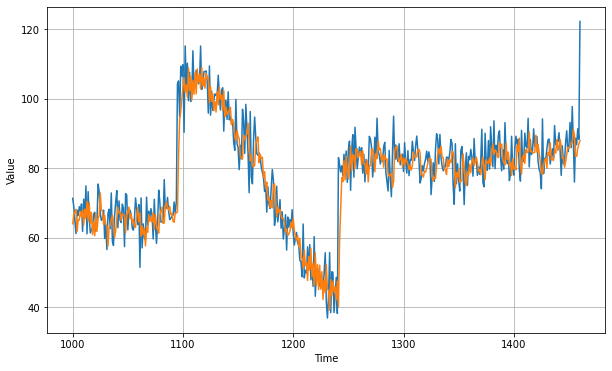

In [84]:
forecast = []

for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [85]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

5.0686116